In [1]:
import pandas as pd
from matplotlib import pyplot
from pandas import to_datetime
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
dataset=pd.read_csv(r"C:\Users\Lasya Priya\Downloads\Telegram Desktop\monthly-car-sales.csv")

In [3]:
dataset.shape

(108, 2)

In [4]:
dataset.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [5]:
dataset.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


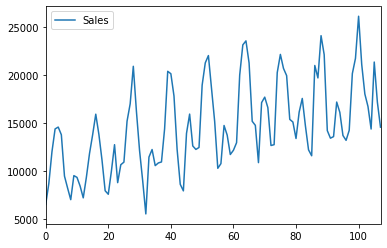

In [6]:
dataset.plot()
pyplot.show()

In [7]:
dataset.columns=['ds','y']
dataset['ds']=to_datetime(dataset['ds'])

# Model Building

1.Fitting the prophet library

In [8]:
model=Prophet()

In [9]:
model.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Lasya Priya\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future=list()
for i in range(1,13):
    date='1969-%02d' % i
    print(date)
    future.append([date])
future=pd.DataFrame(future)
future.columns=['ds']
future['ds']=to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [11]:
future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


In [12]:
forecast=model.predict(future)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,18445.028716,13803.347213,16925.136453,18445.008563,18445.028716,-3068.276265,-3068.276265,-3068.276265,-3068.276265,-3068.276265,-3068.276265,0.0,0.0,0.0,15376.752451
1,1969-02-01,18499.999667,14699.238236,17774.605840,18498.920424,18500.744035,-2361.268184,-2361.268184,-2361.268184,-2361.268184,-2361.268184,-2361.268184,0.0,0.0,0.0,16138.731483
2,1969-03-01,18549.650850,19756.160823,22951.369413,18546.912956,18551.988932,2801.452935,2801.452935,2801.452935,2801.452935,2801.452935,2801.452935,0.0,0.0,0.0,21351.103785
3,1969-04-01,18604.621801,21883.256466,24945.619597,18599.085744,18608.997548,4875.232969,4875.232969,4875.232969,4875.232969,4875.232969,4875.232969,0.0,0.0,0.0,23479.854771
4,1969-05-01,18657.819497,23431.122877,26587.209868,18649.326993,18664.113475,6334.568797,6334.568797,6334.568797,6334.568797,6334.568797,6334.568797,0.0,0.0,0.0,24992.388293


2.Obtaining the summary and plotting the results

In [14]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15376.752451,13803.347213,16925.136453
1,1969-02-01,16138.731483,14699.238236,17774.605840
2,1969-03-01,21351.103785,19756.160823,22951.369413
3,1969-04-01,23479.854771,21883.256466,24945.619597
4,1969-05-01,24992.388293,23431.122877,26587.209868
5,1969-06-01,22254.527429,20617.862854,23856.725858
6,1969-07-01,17901.835593,16317.228572,19450.586174
7,1969-08-01,15730.040830,14215.683733,17336.800072
8,1969-09-01,14235.917670,12604.045066,15805.260261
9,1969-10-01,18672.473959,16991.022761,20178.357503


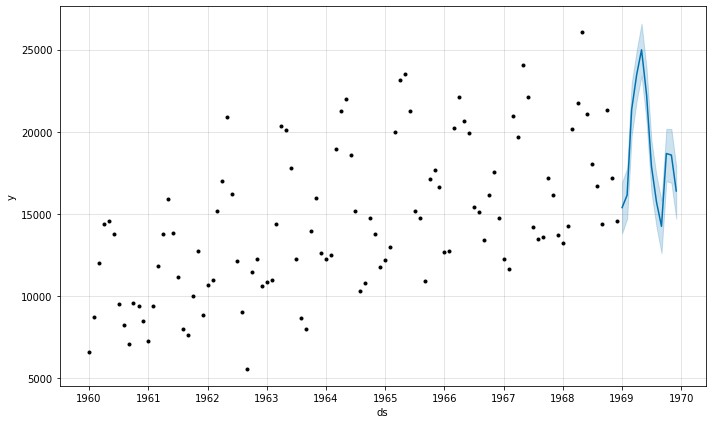

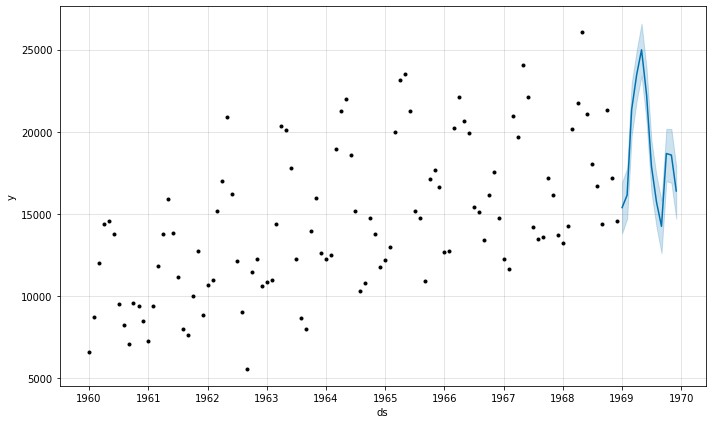

In [15]:
model.plot(forecast)

3.Save the model

In [16]:
import joblib
joblib.dump(model,"sales.sav")

['sales.sav']